<a href="https://colab.research.google.com/github/Welison-Mattedi/MVP-teste/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Welison Mattedi

**Matrícula:** 4052025000152

**Dataset:** O dataset Carros_Usados foi retirado do site e adaptado (https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk/data)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema
O conjunto de dados deste dataset é uma coleção abrangente de informações automotivas extraídas de um site de venda de veículos automotivo, autotrader.co.uk.
Este conjunto de dados compreende 3.685 carros seminovos à venda, cada um representando um anúncio de veículo exclusivo, e inclui treze atributos distintos que fornecem insights valiosos sobre o mundo automobilístico.


## Hipóteses do Problema

Temos as seguintes hipótesis:

- As variáveis disponíveis influenciam o preço?
- Os dados estão corretos e confiáveis?
- Os dados representam o mercado como um todo?

## Tipo de Problema


Este é um problema de **classificação supervisionada**, pois o aprendizado supervisionado, o modelo aprende a partir de exemplos rotulados, ou seja, o conjunto de dados possui uma variável alvo conhecida, que o modelo tenta prever com base nas variáveis de entrada, no caso as caracteristicas dos carros como quilometragem rodada, ano de fabricação, consumo de combustivel, etc.




## Seleção de Dados

O dataset Carros_Usados é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset *used_cars_UK* contém 3.685 carros seminovos à venda, cada um representando um anúncio de veículo exclusivo, e inclui treze atributos distintos que são:


*   Title-----------------------------------Nome
*   Price----------------------------------Libras (£)
*   Mileage(miles)------------------Quilometragem (em milhas)
*   Registration(year)--------------Ano de fabricação ou ano de registro
*   Previous Owners----------------Proprietários anteriores
*   Fuel Type---------------------------Tipo de combustível (gasolina, diesel, hibrido)
*   Body Type--------------------------Tipo de carroceria (hatch, sedan, coupe)
*   Engine--------------------------------Motor (capacidade de cilindrada do motor (L), 1.0, 1.2, 1.3, ...)
*   Gearbox-----------------------------Tipo de câmbio (manual ou automático)
*   Seats---------------------------------Número de ocupantes
*   Doors---------------------------------Número de portas (3,4,5)
*   Emission Class------------------Classes de emissão de CO2, como as normas Euro (Euro 1, 2, 3, 4, 5, 6)
*   Service history-------------------Hitórico de manutenções (nenhum, 1, 2, ...)

Fuel type, Body type, Engine, Gearbox, Emission Class:são características técnicas do carros.


















#Hipótesis sobre o problema

Variáveis	como ano de fabricação, marca e modelo, quilometragem são suficientes para explicar o preço. Carros de marca premium como, Mercedes Bens, BMW entre outras são mais caros.

Cada registro representa um único carro.

O conjunto reflete o mercado real de automóveis a venda.

O comportamento do mercado não mudou drasticamente. Carros mais novos de ano tendem a ser mais caros e carros mais antigos tendem a ser mais baratos.

Considerando um limite de £5.000 é adequado para definir “preço alto”.





# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [ ]:
# importando dados uma url para um dataframe

# url a importar
url_dados= 'https://raw.githubusercontent.com/Welison-Mattedi/MVP-teste/refs/heads/main/Carros_Usados.csv'

dataset = pd.read_csv(url_dados)

In [ ]:
# verificando que 'Carros_Usados' é um dataframe
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
# exibindo as dimensões do dataset
dataset.shape

(3685, 13)

O dataset Carros_Usados contém 3685 linhas e 14 colunas.

In [ ]:
#exibir o nome das colunas
dataset.columns

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')

In [ ]:
# verificando os tipos de cada coluna
dataset.dtypes

,0
Title,object
Price,int64
Mileage(miles),int64
Registration_Year,int64
Previous Owners,float64
Fuel type,object
Body type,object
Engine,object
Gearbox,object
Doors,float64


Verificando o tipo de colunas, temos:

Title, Fuel type, Body type, Engine, Emission Class, Service history são do tipo *Object*

Price, Mileage(miles), Registration_Year dão do tipo *Int*

Previous Owners, Doors, Seats, Engine Size são do tipo *Float*

In [ ]:
# exibir as primeiras linhas do dataset
dataset.head()


,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
# exibir um sumario estatístico do dataset
dataset.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


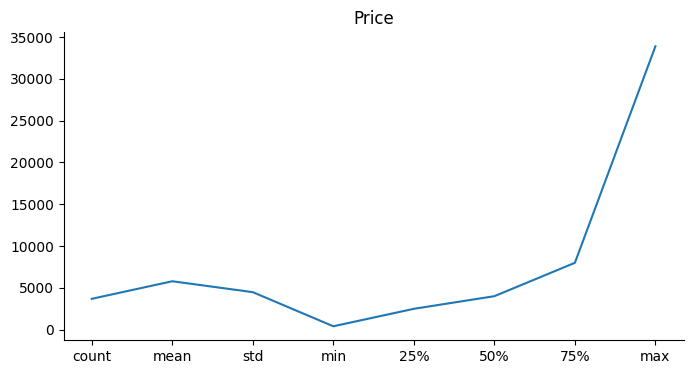

In [ ]:
dataset.describe()['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)



Representando, por exemplo, a coluna de preços dos veículos em um gráfico de linhas para melhor vizualização das informações.

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Carros_Usados, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

No dataset temos colunas com valores ausentes:

Previous Owners: 1409 ausentes (aprox. 38%)

Engine: 45 ausentes

Doors: 25 ausentes

Seats: 35 ausentes

Emission Class: 87 ausentes

Service history: 3145 ausentes (aprox. 85%)

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Carros_Usados:")
dataset.isnull().sum()

Valores nulos no dataset Carros_Usados:


,0
Title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,1409
Fuel type,0
Body type,0
Engine,45
Gearbox,0
Doors,25


## Total e Tipo das Instâncias

O dataset possui 3685 linhas e 13 colunas apresentando dados e características de veículos seminovos.

In [ ]:
# verificando o total de instâncias
print(f"Total de instâncias: {len(dataset)}")
print("\nTipos de dados por coluna:")
print(dataset.info())

Total de instâncias: 3685

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.4+ KB
None


In [ ]:
# exibindo a quantidade de linhas por coluna
dataset.count()

,0
Title,3685
Price,3685
Mileage(miles),3685
Registration_Year,3685
Previous Owners,2276
Fuel type,3685
Body type,3685
Engine,3640
Gearbox,3685
Doors,3660


In [ ]:
# ordenando o dataframe por uma coluna
# Por exemplo a coluna Price em ordem crescente
dataset.sort_values(by='Price')

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3243,SEAT Ibiza,400,120842,2010,4.0,Diesel,Hatchback,1.2L,Manual,3.0,5.0,Euro 5,NaN
3276,Vauxhall Astra,450,115000,2005,NaN,Diesel,Hatchback,1.7L,Manual,5.0,5.0,Euro 4,NaN
1236,Vauxhall Astra,495,97000,2011,7.0,Diesel,Hatchback,1.7L,Manual,5.0,5.0,Euro 5,NaN
3244,Ford Fiesta,499,111875,2007,4.0,Petrol,Hatchback,1.4L,Manual,3.0,5.0,Euro 4,NaN
3240,Renault Clio,500,138061,2007,5.0,Petrol,Hatchback,1.4L,Manual,3.0,5.0,Euro 4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,SEAT Ateca,25995,222,2023,NaN,Petrol,SUV,1.5L,Manual,5.0,5.0,Euro 6,NaN
3228,Land Rover Range Rover Sport,25995,36363,2015,NaN,Diesel,SUV,3.0L,Automatic,5.0,5.0,Euro 5,NaN
3222,BMW X3 Series,28240,45155,2019,1.0,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 6,NaN
2934,Land Rover Range Rover Sport,30000,46000,2017,2.0,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 6,NaN


In [ ]:
# selecionando uma coluna específica
dataset['Title']

,Title
0,SKODA Fabia
1,Vauxhall Corsa
2,Hyundai i30
3,MINI Hatch
4,Vauxhall Corsa
...,...
3680,Renault Megane
3681,Audi A4
3682,BMW 3 Series
3683,Honda Accord


#Selecionando um subconjunto de colunas para todas as linhas
Aqui selecionamos a coluna *Title e Price*

In [ ]:
# selecionando um subconjunto de colunas para todas as linhas
dataset.loc[:, ['Title', 'Price', 'Previous Owners' ]]


,Title,Price,Previous Owners
0,SKODA Fabia,6900,3.0
1,Vauxhall Corsa,1495,4.0
2,Hyundai i30,949,NaN
3,MINI Hatch,2395,5.0
4,Vauxhall Corsa,1000,NaN
...,...,...,...
3680,Renault Megane,1395,4.0
3681,Audi A4,6990,NaN
3682,BMW 3 Series,3995,NaN
3683,Honda Accord,1390,NaN


Gerando um gráfico de barras representando a coluna Previous Owners.

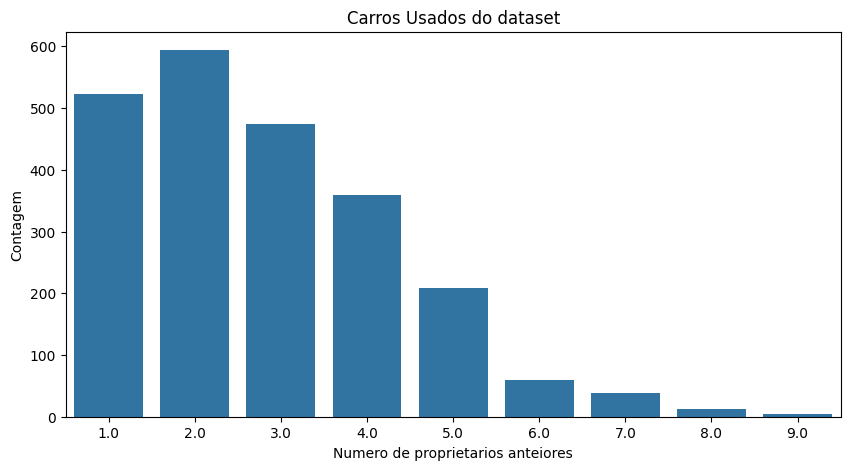

In [ ]:
# gráfico de barras simples
plt.figure(figsize=(10, 5))
sns.countplot(x='Previous Owners', data=dataset)
plt.title('Carros Usados do dataset')
plt.xlabel('Numero de proprietarios anteiores')
plt.ylabel('Contagem')
plt.show()

Podemos também modifiar o código para representar os valores exatos sobre as colunas.


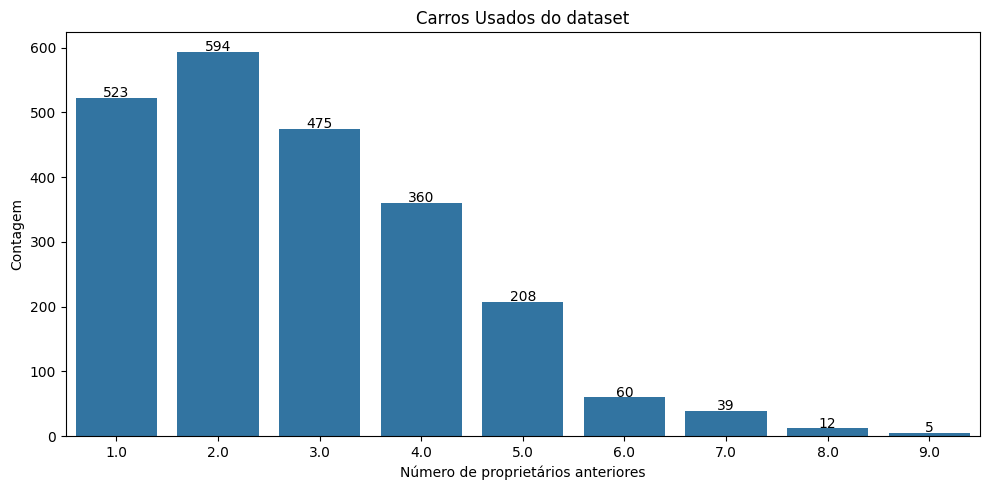

In [ ]:
# Gráfico modificado para mostrar o valor exato em cima de cada barra
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Previous Owners', data=dataset)
plt.title('Carros Usados do dataset')
plt.xlabel('Número de proprietários anteriores')
plt.ylabel('Contagem')

# Adicionar os valores acima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center'
    )

plt.tight_layout()
plt.show()

No grafico acima, podemos observar facilmente que a maioria dos carros já teve mais 2 proprietários.


Gerando um gráfico de barras representando a coluna Price.
Aqui, foi aplicado um filtro na faixa de valores entre 2000 e 10000 Libras, para melhor visualização dos dados e exibindo linhas de grade para melhor visualização dos valores.

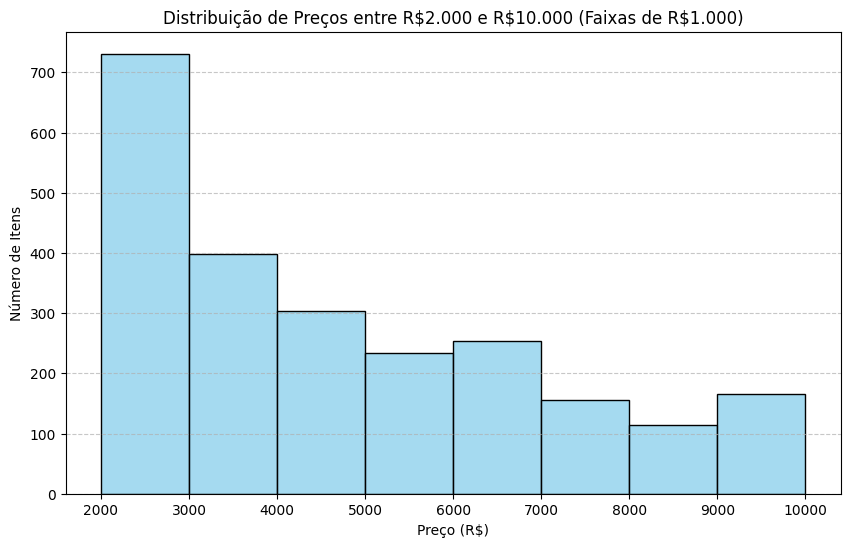

In [ ]:
# gráfico de barras
plt.figure(figsize=(10, 6))
sns.histplot(dataset_filtrado['Price'], bins=np.arange(2000, 10001, 1000), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribuição de Preços entre R$2.000 e R$10.000 (Faixas de R$1.000)')
plt.xlabel('Preço (R$)')
plt.ylabel('Número de Itens')
plt.xticks(np.arange(2000, 11000, 1000))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

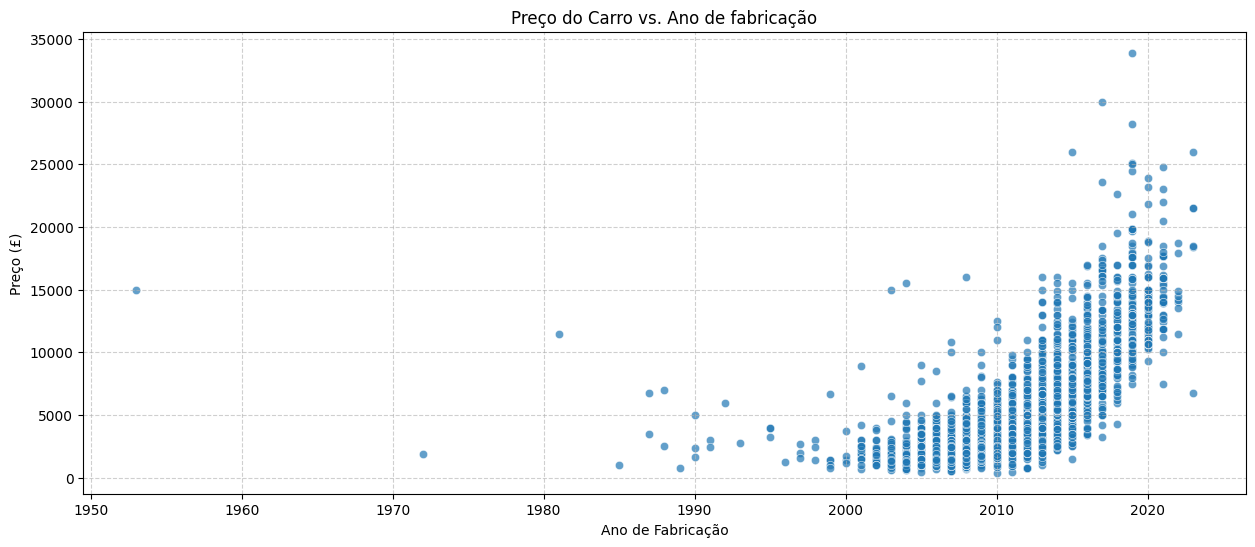

In [ ]:
# grafico de dispersão prço por ano de fabricação
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Registration_Year', y='Price', data=dataset, alpha=0.7)
plt.title('Preço do Carro vs. Ano de fabricação')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço (£)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
dataset.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
dataset.describe().loc['mean']

,mean
Price,5787.145726
Mileage(miles),81328.164722
Registration_Year,2011.835007
Previous Owners,2.807557
Doors,4.321038
Seats,4.900274


Um bom gráfico para mostrar a média de de preços ao longo dos anos é o gráfico de linhas, pois é bom para mostrar tendências e mudanças ao longo do tempo. No eixo X temos uma ordem sequencial (anos).

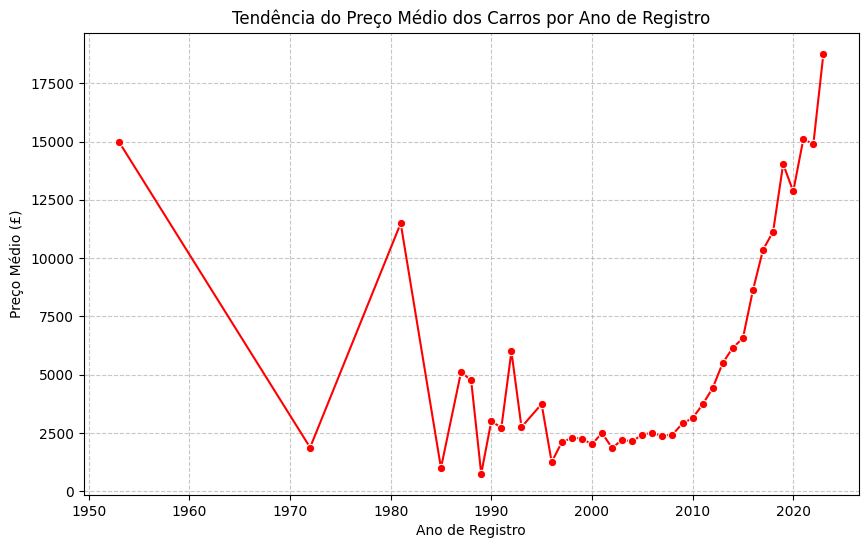

In [ ]:
# Mostrar o preço médio ao longo do anos
dataset_preco_medio_por_ano = dataset.groupby('Registration_Year')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Registration_Year', y='Price', data=dataset_preco_medio_por_ano, marker='o', color = 'red')
plt.title('Tendência do Preço Médio dos Carros por Ano de Registro')
plt.xlabel('Ano de Registro')
plt.ylabel('Preço Médio (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

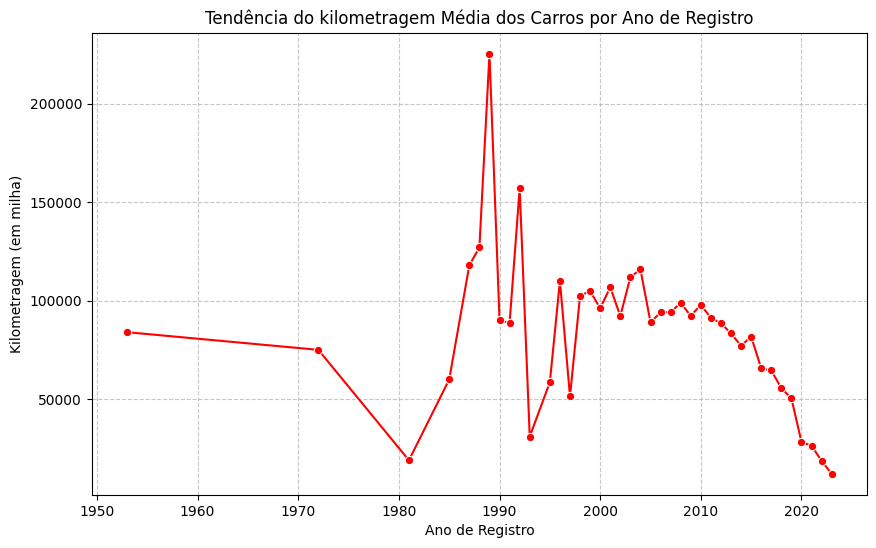

In [ ]:
# Mostrar o preço médio ao longo do anos
dataset_quilometragem_media_por_ano = dataset.groupby('Registration_Year')['Mileage(miles)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Registration_Year', y='Mileage(miles)', data=dataset_quilometragem_media_por_ano, marker='o', color = 'red')
plt.title('Tendência do kilometragem Média dos Carros por Ano de Registro')
plt.xlabel('Ano de Registro')
plt.ylabel('Kilometragem (em milha)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
dataset.describe().loc['std']

,std
Price,4480.810572
Mileage(miles),39420.833595
Registration_Year,5.092566
Previous Owners,1.546028
Doors,0.986902
Seats,0.577200


Utilizando um grafico de barras para mostrar o desvio padrão. Adicionalmente foi colocado barras para representar o erro. Interessante, pois o  gráfico de barras com barras de erro (error bars) mostra o preço médio por ano de fabricação, com as barras de erro representando o desvio padrão — uma ótima forma de visualizar dispersão de preços entre os grupos.

Altura das barras representa a média de preço dos carros por ano de fabricação
Tamanho das linhas de erro representa o quão variável é o preço dentro de cada grupo.

As linhas maiores representam maior dispersão (desvio padrão alto) e as linhas menores, os preços mais consistentes dentro do grupo.

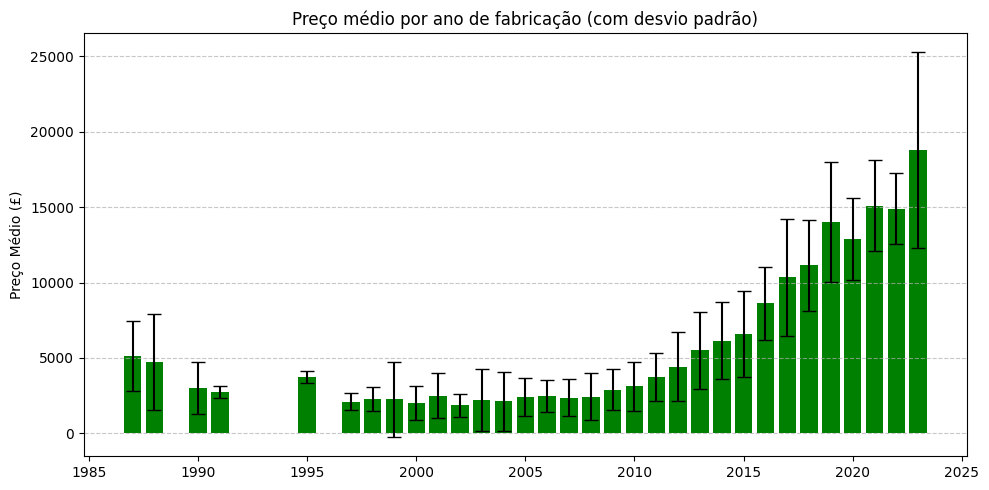

In [ ]:
# Agrupar por ano de fabricação
grouped = dataset.groupby('Registration_Year')['Price'].agg(['mean', 'std']).dropna()

# Gráfico de barras com erro
plt.figure(figsize=(10, 5))
plt.bar(grouped.index, grouped['mean'], yerr=grouped['std'], capsize=5, color='green')
plt.ylabel('Preço Médio (£)')
plt.title('Preço médio por ano de fabricação (com desvio padrão)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos tambem utilizar um gráfico de dispersão para representar Preço por Ano de fabricação

Podemos utilizar também por um gráfico tipo Boxplot para representar a distribuição do preço por ano de fabricação.

Obs.: Foi realizado um ajuste para mostrar dados a partir do ano 2000.

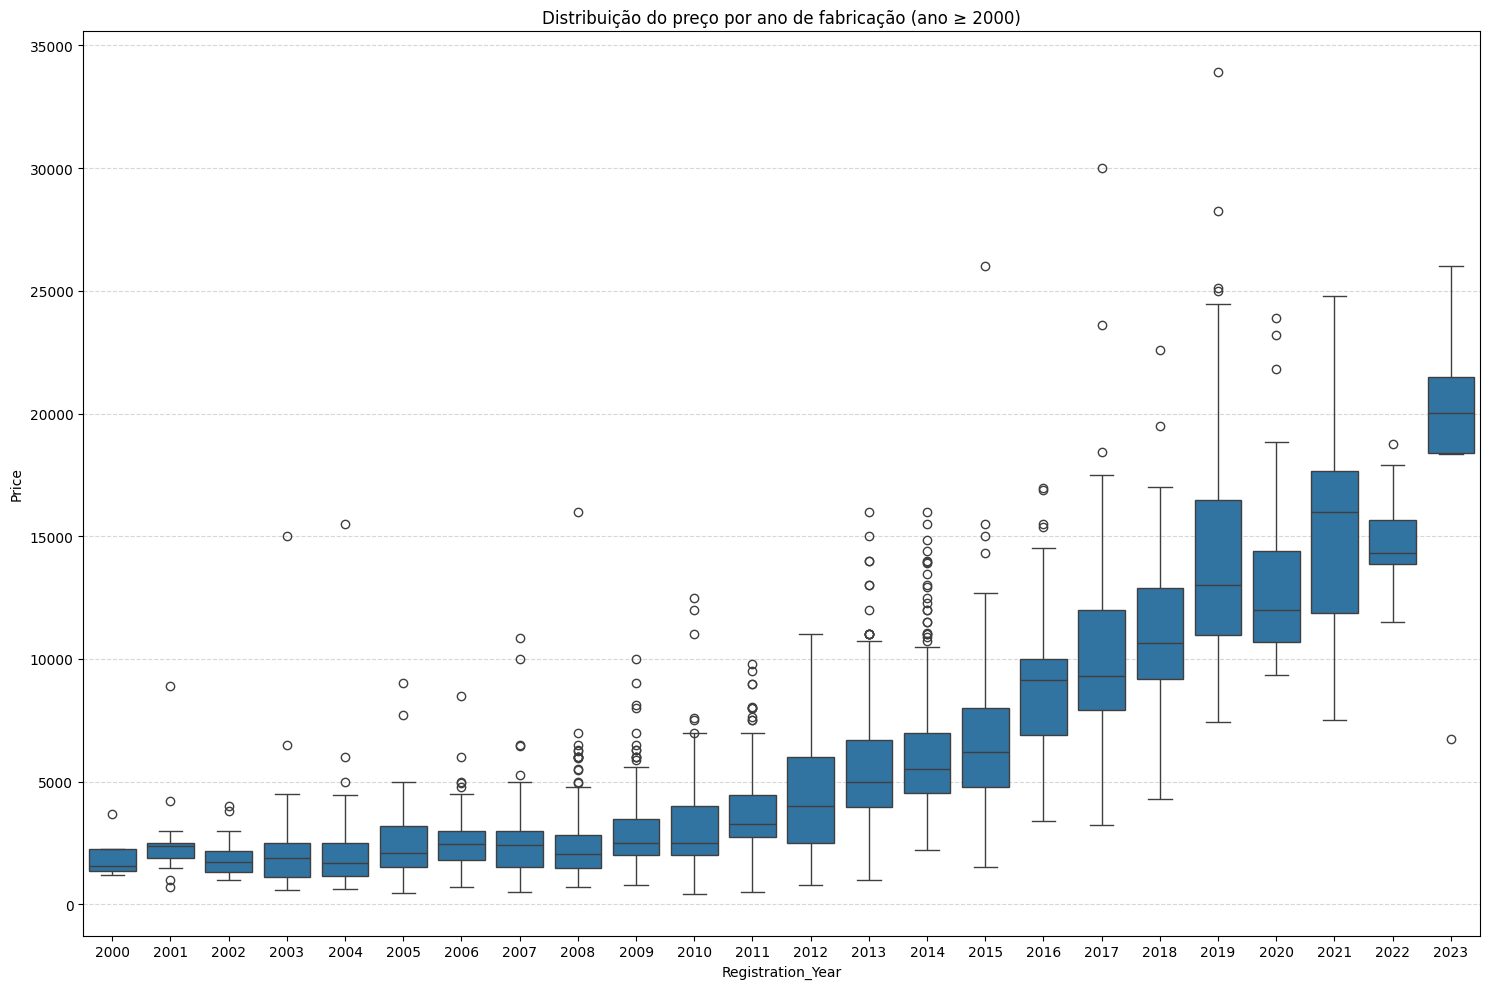

In [ ]:
# Filtrar os dados para incluir apenas veículos a partir do ano 2000
dataset_filtrado = dataset[dataset['Registration_Year'] >= 2000]
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset_filtrado, x='Registration_Year', y='Price')
plt.title('Distribuição do preço por ano de fabricação (ano ≥ 2000)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O boxplot acima mostra a distribuição completa, incluindo mediana, quartis e dispersão dos dados — o desvio padrão não é exibido diretamente, mas pode ser inferido pela largura da caixa e dos bigodes.
A linha dentro da caixa representa a mediana (valor do meio).
As bordas da caixa representa o primeiro e terceiro quartis (Q1 e Q3).
Os "bigodes" (linhas que saem da caixa) representam extremos dos dados, mas excluem outliers.
Pontos fora dos bigodes são outliers (valores atípicos, como carros extremamente caros).

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

Analizando alguns atributos, temos:


### Price
Analisando o atributo 'Price' (preço dos veículos), podemos levantar curiosidades e fatos importantes que ajudam a interpretar melhor os dados e a orientar decisões no modelo.

A distribuição de Price é simétrica à esquerda e assimétrica à direita. Analizando o histograma, vemos que a maioria dos carros custa menos de £10.000.
No código abaixo, sugerimos um valor de corte em 5000 libras. Abaixo desse valor podemos considerar os carros como baratos, e acima deste valor como caros.

Existem alguns poucos carros muito caros (outliers), que "puxam" a média para cima.

A mediana costuma ser inferior à média, o que indica que a maior parte dos carros é mais barata do que parece olhando apenas a média.

OBS.: o atributo Price tem forte correlação com outtros atributos como:

Registration_Year: carros mais novos são mais caros;

Mileage(miles): carros mais rodados em geral são mais baratos;

Fuel type: tipos como elétrico ou híbrido tendem a ter preços médios mais altos;

Gearbox: carros com cambio automático podem são mais caros em comparação com mesmo modelo de com cambio manual.

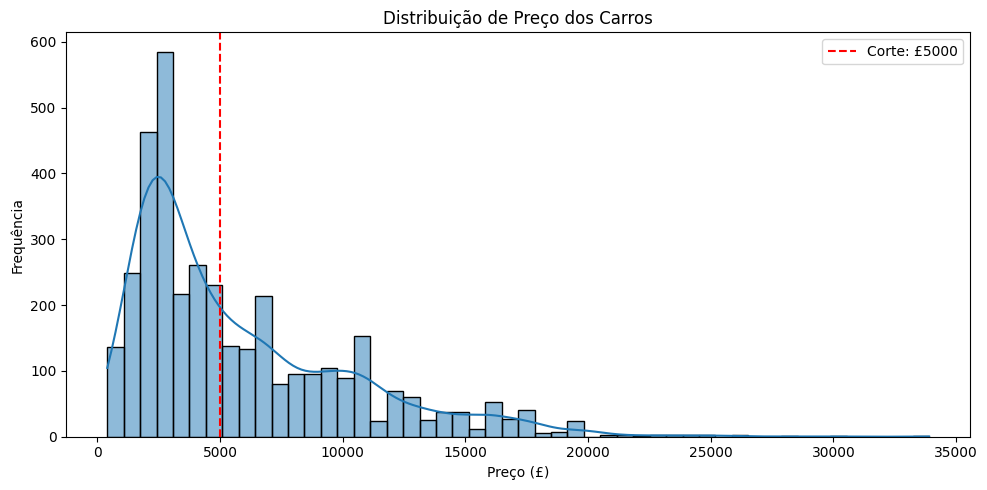

In [ ]:
# Plotando um histograma para representar a coluna de preços do automóveis
plt.figure(figsize=(10,5))
sns.histplot(dataset['Price'], bins=50, kde=True)
plt.axvline(5000, color='red', linestyle='--', label='Corte: £5000')
plt.title('Distribuição de Preço dos Carros')
plt.xlabel('Preço (£)')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
dataset['Price'].describe()

,Price
count,3685.000000
mean,5787.145726
std,4480.810572
min,400.000000
25%,2490.000000
50%,4000.000000
75%,7995.000000
max,33900.000000


O código acima mostra que o percentil 75% está bem próximo da média, enquanto o valor máximo está muito distante.

### Registration_Year

Outro atributo analisado é Registration_Year (Ano de Registro). É um dado importantes em um dataset de carros usados. Quando analisamos a distribuição dessa variável, várias curiosidades e fatos relevantes surgem — tanto estatísticos quanto de negócio.
A maioria dos carros registrados está nos anos 2000 em diante (especialmente entre 2005 e 2019). Quanto mais recente o ano de registro, maior tende a ser o preço do carro.


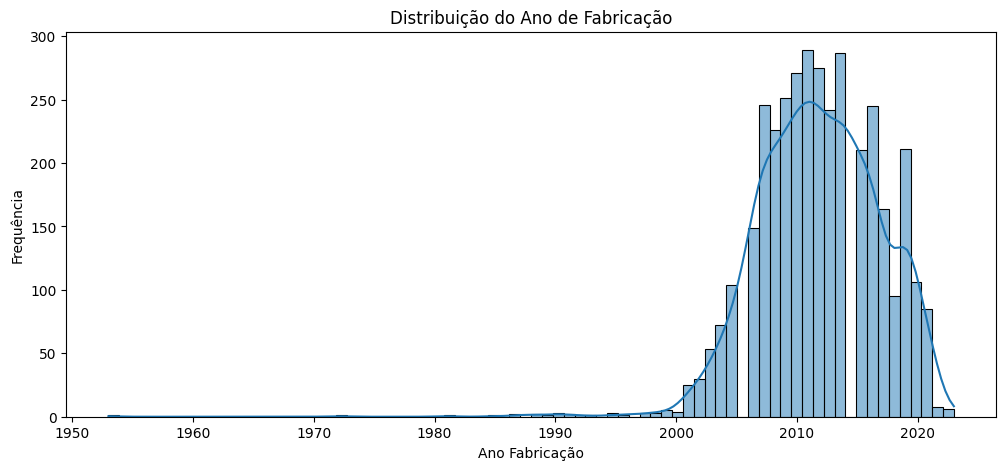

In [ ]:
# Histograma do ano de fabricação
plt.figure(figsize=(12, 5))
sns.histplot(dataset['Registration_Year'], kde=True)
plt.title('Distribuição do Ano de Fabricação')
plt.xlabel('Ano Fabricação')
plt.ylabel('Frequência')
plt.show()

In [ ]:
dataset['Registration_Year'].describe()

,Registration_Year
count,3685.000000
mean,2011.835007
std,5.092566
min,1953.000000
25%,2008.000000
50%,2012.000000
75%,2015.000000
max,2023.000000


O código acima mostra que a maioria dos carros do dataset analizado são do ano de 2015.

In [ ]:
# Estatísticas descritivas agrupadas por kilometros rodados
dataset.groupby('Mileage(miles)').describe()

Price                                                           \
               count     mean         std      min      25%      50%      75%   
Mileage(miles)                                                                  
1                2.0  18440.0  106.066017  18365.0  18402.5  18440.0  18477.5   
6                1.0  15500.0         NaN  15500.0  15500.0  15500.0  15500.0   
222              1.0  25995.0         NaN  25995.0  25995.0  25995.0  25995.0   
1048             1.0  21495.0         NaN  21495.0  21495.0  21495.0  21495.0   
4000             1.0  18499.0         NaN  18499.0  18499.0  18499.0  18499.0   
...              ...      ...         ...      ...      ...      ...      ...   
208000           1.0   1995.0         NaN   1995.0   1995.0   1995.0   1995.0   
225318           1.0    750.0         NaN    750.0    750.0    750.0    750.0   
234680           1.0   2600.0         NaN   2600.0   2600.0   2600.0   2600.0   
274100           7.0    795.0    0.000000    795.0    795.0    795.0    795.0   
1110100          1.0   2495.0         NaN   2495.0   2495.0   2495.0   2495.0   

                        Registration_Year          ... Doors      Seats       \
                    max             count    mean  ...   75%  max count mean   
Mileage(miles)                                     ...                         
1               18515.0               2.0  2023.0  ...   5.0  5.0   2.0  5.0   
6               15500.0               1.0  2004.0  ...   4.0  4.0   1.0  5.0   
222             25995.0               1.0  2023.0  ...   5.0  5.0   1.0  5.0   
1048            21495.0               1.0  2023.0  ...   5.0  5.0   1.0  5.0   
4000            18499.0               1.0  2021.0  ...   5.0  5.0   1.0  5.0   
...                 ...               ...     ...  ...   ...  ...   ...  ...   
208000           1995.0               1.0  2009.0  ...   2.0  2.0   1.0  4.0   
225318            750.0               1.0  1989.0  ...   5.0  5.0   0.0  NaN   
234680           2600.0               1.0  2011.0  ...   5.0  5.0   1.0  5.0   
274100            795.0               7.0  2004.0  ...   5.0  5.0   7.0  5.0   
1110100          2495.0               1.0  2003.0  ...   3.0  3.0   1.0  4.0   

                                              
                std  min  25%  50%  75%  max  
Mileage(miles)                                
1               0.0  5.0  5.0  5.0  5.0  5.0  
6               NaN  5.0  5.0  5.0  5.0  5.0  
222             NaN  5.0  5.0  5.0  5.0  5.0  
1048            NaN  5.0  5.0  5.0  5.0  5.0  
4000            NaN  5.0  5.0  5.0  5.0  5.0  
...             ...  ...  ...  ...  ...  ...  
208000          NaN  4.0  4.0  4.0  4.0  4.0  
225318          NaN  NaN  NaN  NaN  NaN  NaN  
234680          NaN  5.0  5.0  5.0  5.0  5.0  
274100          0.0  5.0  5.0  5.0  5.0  5.0  
1110100         NaN  4.0  4.0  4.0  4.0  4.0  

[1570 rows x 40 columns]

### Preço por Ano de fabricação


Aqui foi usado um gráfico tipo Boxplot, pois ele sumariza a mediana, os quartis (25% e 75%), a dispersão dos dados e quaisquer outliers para cada ano, permitindo uma comparação visual eficiente entre as distribuições de preços em diferentes anos.

Foi utilizado um filtro com o objetivo de reduzir o conjunto de dados para focar em uma faixa específica de preços e anos, o que pode tornar a visualização mais clara e relevante para a análise desejada, já que grande maioria dos carros estão nessa faixa de preçoo e ano. Foi realizado uma rotação nos dados do eixo X para evitar que os rótulos dos anos se sobreponham, tornando o eixo X mais legível.



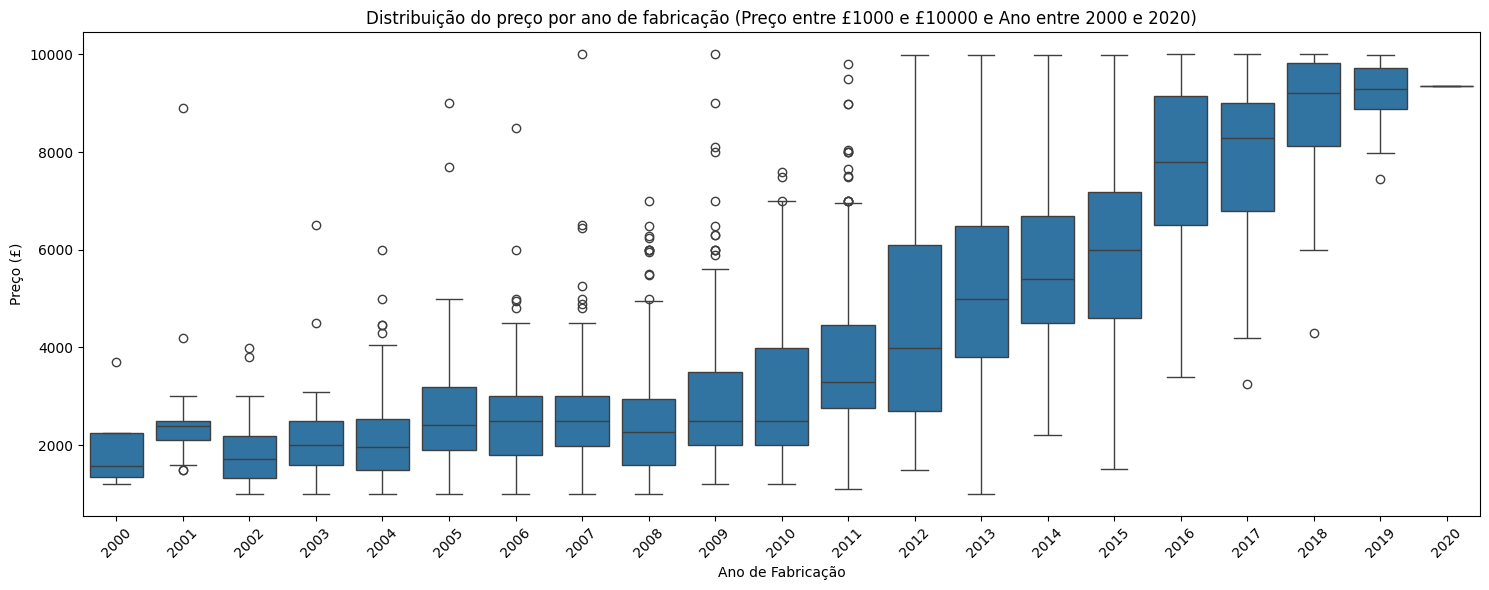

In [ ]:
# Boxplot do preço por ano de fabricação (filtrando por preço e ano)
dataset_filtrado = dataset[(dataset['Price'] >= 1000) & (dataset['Price'] <= 10000) & (dataset['Registration_Year'] >= 2000) & (dataset['Registration_Year'] <= 2020)]
plt.figure(figsize=(15, 6))
sns.boxplot(x='Registration_Year', y='Price', data=dataset_filtrado)
plt.title('Distribuição do preço por ano de fabricação (Preço entre £1000 e £10000 e Ano entre 2000 e 2020)')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Quais impressões o boxplot trouxe?**

Com este tipo de gráfico, podemos observar facilmente valores mínimos (sem outliers), primeiro quartil (Q1) – 25% dos dados estão abaixo dele, mediana (Q2) – linha central (50% dos dados abaixo), terceiro quartil (Q3) – 75% dos dados estão abaixo, valores máximo e outliers de forma simples, observando a forma das caixas entre categorias.




## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

O método corr() funciona apenas com dados numéricos. No conjunto de dados, a primeira coluna ('Title') contém nomes de carros, que por sua vez são strings.

numeric_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']: Esta linha cria uma lista chamada numeric_cols contendo os nomes das colunas no seu DataFrame que possuem dados numéricos.
dataset[numerical_cols]: Seleciona apenas as colunas listadas em numeric_cols do conjunto de dados DataFrame.
.corr(): Este método é aplicado às colunas numéricas selecionadas e calcula a correlação entre pares entre cada par de colunas. O resultado é uma matriz de correlação.
print("\nMatriz de Correlação:"): Esta linha imprime um cabeçalho antes de exibir a matriz de correlação.
print(...): Esta linha imprime a matriz de correlação calculada no console.
A matriz de correlação mostra a intensidade da relação linear entre cada par de variáveis ​​numéricas. Os valores variam de -1 a 1, onde:

1 indica uma correlação linear positiva perfeita.
-1 indica uma correlação linear negativa perfeita.
0 indica que não há correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
numerical_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']
print(dataset[numerical_cols].corr())


Matriz de Correlação:
                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.500158           0.723880   
Mileage(miles)    -0.500158        1.000000          -0.417029   
Registration_Year  0.723880       -0.417029           1.000000   
Previous Owners   -0.479424        0.316160          -0.501045   
Doors              0.113352       -0.037042           0.217475   
Seats             -0.027406        0.095287           0.037120   

                   Previous Owners     Doors     Seats  
Price                    -0.479424  0.113352 -0.027406  
Mileage(miles)            0.316160 -0.037042  0.095287  
Registration_Year        -0.501045  0.217475  0.037120  
Previous Owners           1.000000 -0.153262 -0.029338  
Doors                    -0.153262  1.000000  0.497163  
Seats                    -0.029338  0.497163  1.000000  


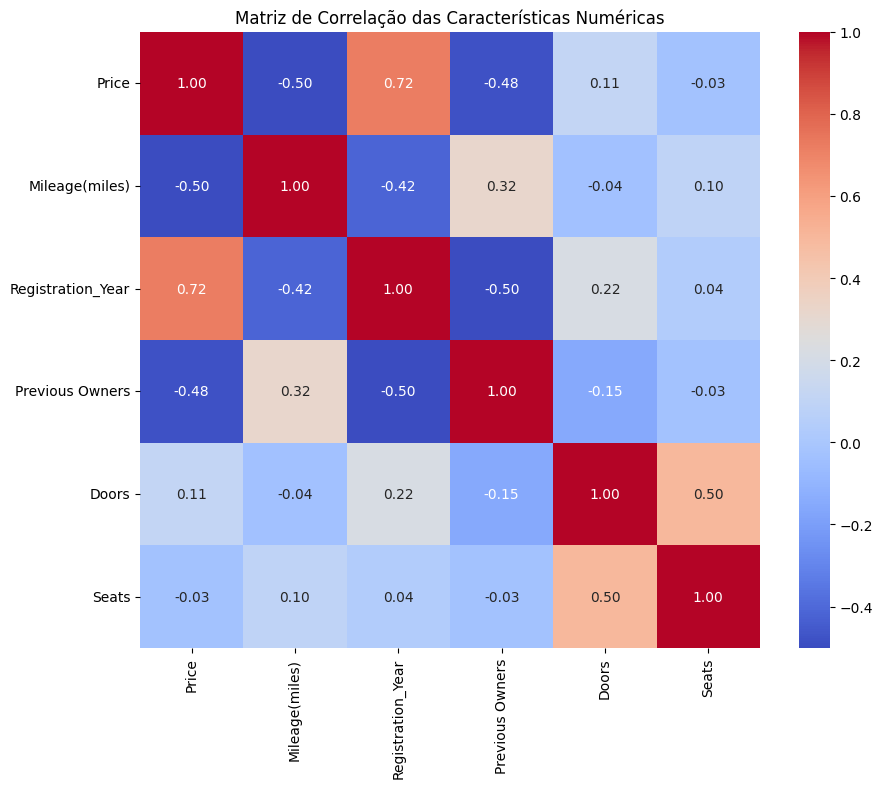

In [ ]:
plt.figure(figsize=(10, 8))
# mapa de calor das variáveis numéricas
numerical_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo, melhorando a qualidade e o desempenho. Na etapa de pré-processamento pode ser feito a limpeza de dados, remoção ou correção de dados faltantes (valores nulos ou NaN), tratamento de  valores fora do padrão esperado (outliers), correção de inconsistências (dados duplicados ou conflitantes), transformação de dados, normalização ou padronização de variáveis numéricas (min-max scaling, z-score), conversão de variáveis categóricas em números (one-hot encoding), criação de novas variáveis, entre outros.


Para um conjunto de treino e teste utilizaremos a coluna Doors

In [ ]:
# Separar features (X) e target (y)
X = dataset.drop('Doors', axis=1)
y = dataset['Doors']

O código abaixo vai retornar um erro pois a coluna Doors possui valores nulos. Ao dividir os dados da coluna Doors em treino e teste, a execução retornou erro, devido a valores ausentes NaN.

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

ValueError: Input y contains NaN.


Assim será necessário remover os valores faltantes e em seguida dividir os dados em treino e teste.

In [ ]:
# Checando por valores de missing na coluna 'Doors'.
print(dataset['Doors'].isnull().sum())


25


In [ ]:
# Removendo as linhas com valores ausentes na coluna 'Doors'.
dataset_cleaned = dataset.dropna(subset=['Doors'])

In [ ]:
# Separe as características (X) e o alvo (y) do conjunto de dados limpo
X_cleaned = dataset_cleaned.drop('Doors', axis=1)
y_cleaned = dataset_cleaned['Doors']

In [ ]:
# Verificando se há valores ausentes na coluna 'Doors' após o tratamento dos dados.
print("\nValores de missing da coluna Doors após tratamento dops dados:")
print(y_cleaned.isnull().sum())


Valores de missing da coluna Doors após tratamento dops dados:
0


In [ ]:
# Separar os dados em conjunto de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2562, 12)
Dimensões de X_test: (1098, 12)
Dimensões de y_train: (2562,)
Dimensões de y_test: (1098,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.
A principal razão para aplicar normalização é garantir que as variáveis numéricas estejam em uma escala semelhante.
Para normalização dos dados, utilizamos a função MinMaxScaler.

Ao aplicar a normalização no conjunto de teste, encontramos um erro, pois a função está sendo aplicado aos dados X_train, que ainda contêm colunas não numéricas, como 'Title', mas a função só pode processar dados numéricos.

In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

O código abaixo vai retornar erro pois precisamos aplicar o *MinMaxScaler* apenas às colunas numéricas do conjunto de dados.

In [ ]:
# Aprende min e max de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

ValueError: could not convert string to float: 'Fiat 500'

Para isso, utilizaremos a função *ColumnTransformer* do *scikit-learn*, que permite aplicar diferentes transformações a diferentes colunas.

In [ ]:
# Identificar coluna numérica e categórica
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Crie um transformador de colunas para aplicar MinMaxScaler às características numéricas
# e passar pelas características categóricas (ou aplicar outras transformações como OneHotEncoder).
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ])


In [ ]:
# Aplicar o transformador de coluna aos dados de treinamento e teste.
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

print(f"Dimensões de X_train_processed: {X_train_normalized.shape}")
print(f"Dimensões de X_test_processed: {X_test_normalized.shape}")

Dimensões de X_train_processed: (2562, 12)
Dimensões de X_test_processed: (1098, 12)


In [ ]:
# Exibir as colunas após a normalização
print(df_normalized.columns)

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Seats', 'Emission Class', 'Service history'],
      dtype='object')


In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
      Title     Price Mileage(miles) Registration_Year Previous Owners  \
0  0.195516  0.116742       0.885714               NaN             0.4   
1  0.195516  0.291862       0.828571               NaN             0.6   
2  0.068759  0.113094       0.571429               0.0             0.6   
3  0.086697  0.453059       0.814286               NaN             0.6   
4  0.074738   0.24188       0.814286              0.25             0.6   

         Fuel type Body type     Engine Gearbox      Seats Emission Class  \
0         Fiat 500    Petrol  Hatchback    0.9L     Manual         Euro 6   
1     SKODA Superb    Petrol  Hatchback    1.8L  Automatic         Euro 5   
2  Volkswagen Polo    Petrol      Coupe    1.0L     Manual         Euro 1   
3     BMW 3 Series    Diesel     Saloon    2.0L  Automatic         Euro 5   
4      Hyundai i20    Petrol  Hatchback    1.4L     Manual         Euro 4   

  Service history  
0             NaN  

O histograma de *Price* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1.

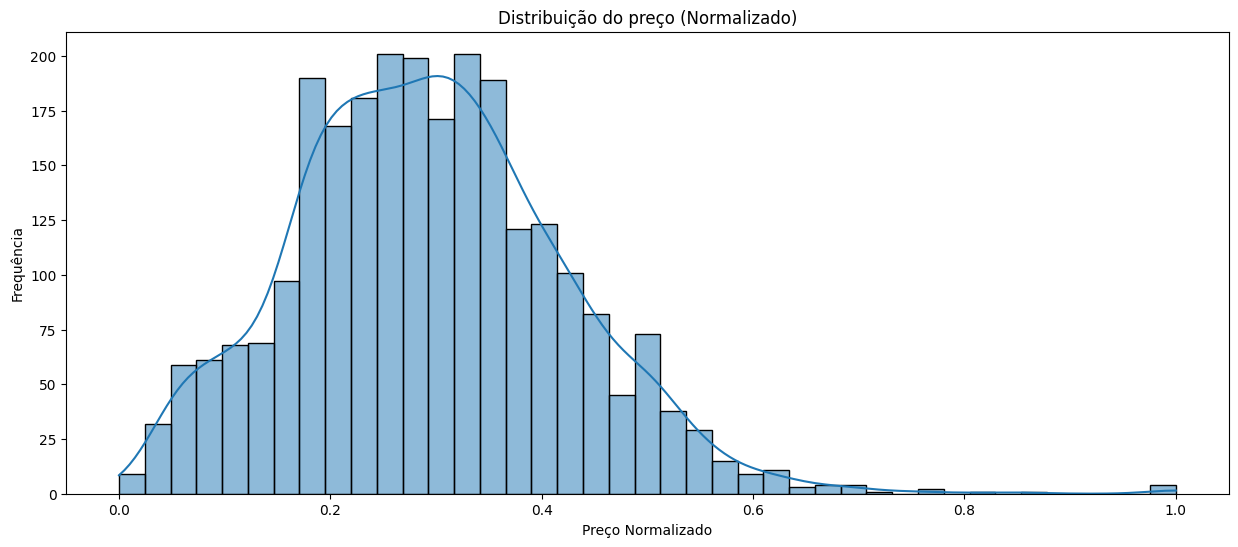

In [ ]:
# Visualização da distribuição após a normalização
plt.figure(figsize=(15, 6))
sns.histplot(df_normalized['Price'], kde=True)
plt.title('Distribuição do preço (Normalizado)')
plt.xlabel('Preço Normalizado')
plt.ylabel('Frequência')
plt.show()

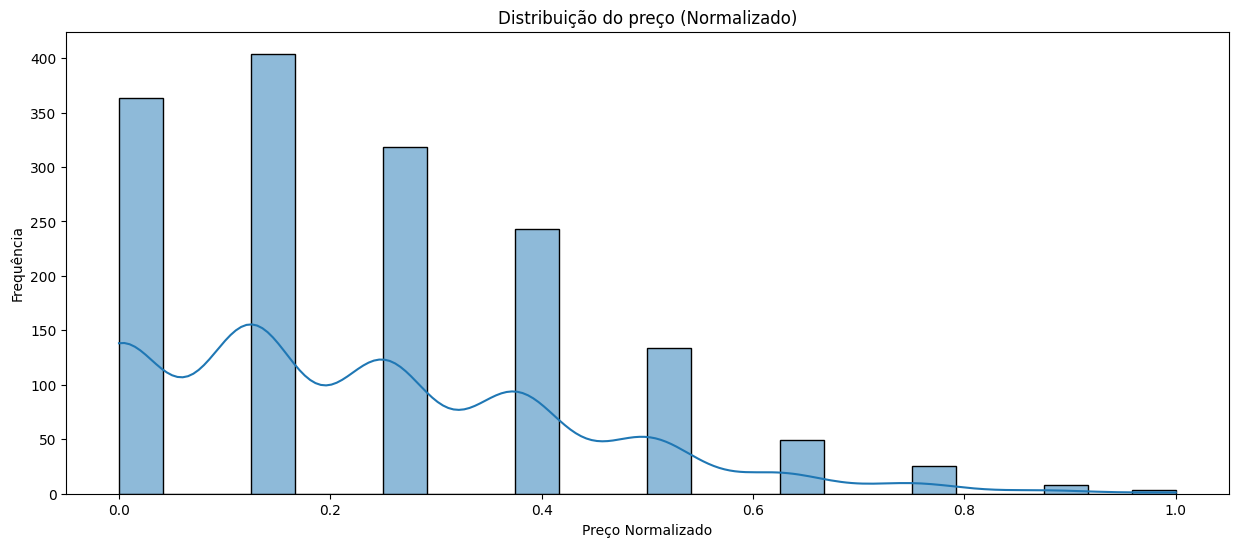

In [ ]:
# Visualização da distribuição após a normalização
plt.figure(figsize=(15, 6))
sns.histplot(df_normalized['Registration_Year'], kde=True)
plt.title('Distribuição do preço (Normalizado)')
plt.xlabel('Preço Normalizado')
plt.ylabel('Frequência')
plt.show()

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aplicar o transformador de coluna nos dados de treinamento e teste usando o StandardScaler
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ])

X_train_standardized = preprocessor_std.fit_transform(X_train)
X_test_standardized = preprocessor_std.transform(X_test)

print(f"Dimensões de X_train_standardized: {X_train_standardized.shape}")
print(f"Dimensões de X_test_standardized: {X_test_standardized.shape}")

Dimensões de X_train_standardized: (2562, 12)
Dimensões de X_test_standardized: (1098, 12)


In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
      Title     Price Mileage(miles) Registration_Year Previous Owners  \
0   0.25404 -1.367088       0.610367               NaN       -1.592401   
1   0.25404 -0.010794      -0.162146               NaN        0.181113   
2 -0.684173 -1.395345      -3.638454         -1.158811        0.181113   
3 -0.551407  1.237675      -0.355275               NaN        0.181113   
4 -0.639918 -0.397903      -0.355275          0.130887        0.181113   

         Fuel type Body type     Engine Gearbox      Seats Emission Class  \
0         Fiat 500    Petrol  Hatchback    0.9L     Manual         Euro 6   
1     SKODA Superb    Petrol  Hatchback    1.8L  Automatic         Euro 5   
2  Volkswagen Polo    Petrol      Coupe    1.0L     Manual         Euro 1   
3     BMW 3 Series    Diesel     Saloon    2.0L  Automatic         Euro 5   
4      Hyundai i20    Petrol  Hatchback    1.4L     Manual         Euro 4   

  Service history  
0             NaN  

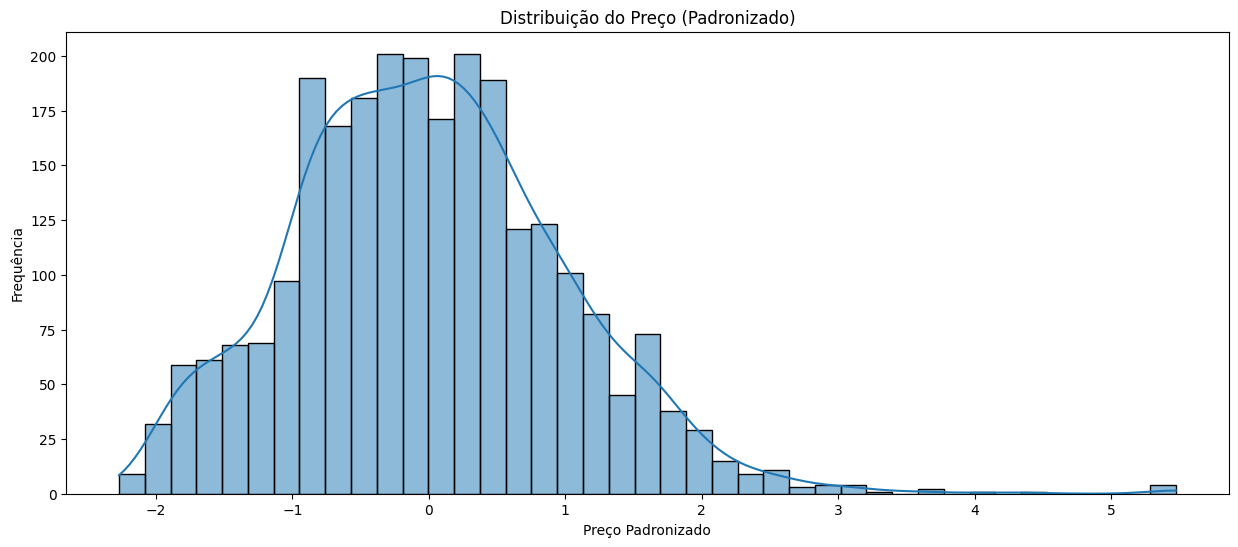

In [ ]:
# Visualização da distribuição após a padronização
plt.figure(figsize=(15, 6))
sns.histplot(df_standardized['Price'], kde=True)
plt.title('Distribuição do Preço (Padronizado)')
plt.xlabel('Preço Padronizado')
plt.ylabel('Frequência')
plt.show()

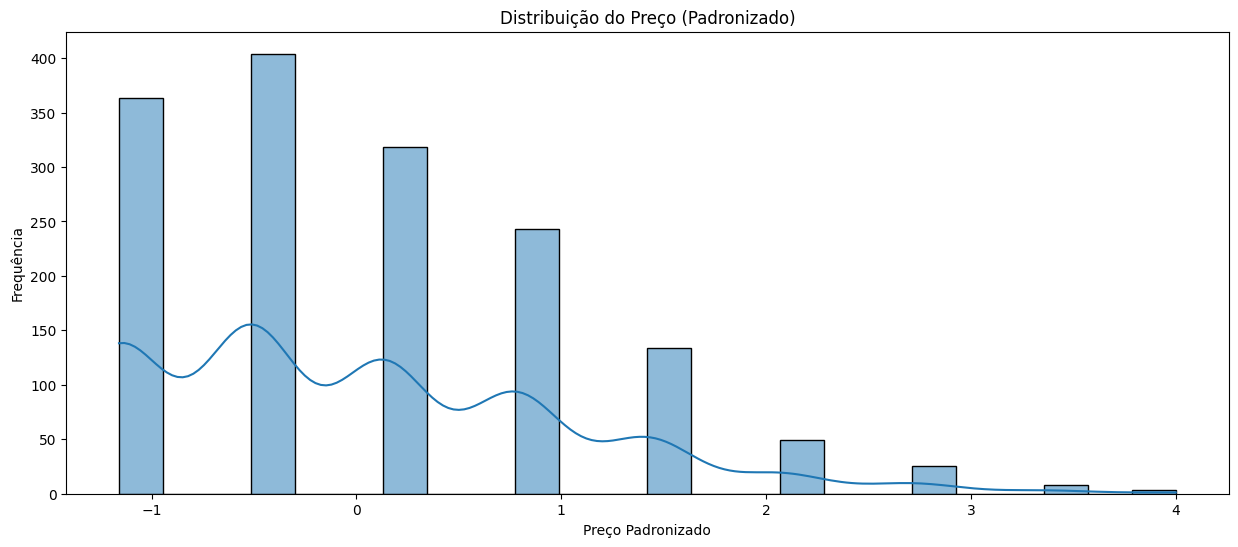

In [ ]:
# Visualização da distribuição após a padronização
plt.figure(figsize=(15, 6))
sns.histplot(df_standardized['Registration_Year'], kde=True)
plt.title('Distribuição do Preço (Padronizado)')
plt.xlabel('Preço Padronizado')
plt.ylabel('Frequência')
plt.show()


O histograma padronizado será visualmente parecido com o original, mas o eixo X será centrado em 0. Ele mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de 1, centralizando a distribuição.

A padronização é essencial para o treinamento de modelos, mas não para visualização de dados brutos.

## Tratamento de Valores Nulos

O dataset Carros_Usados original possui valores nulos. Assim, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Carros_Usados:")
dataset.isnull().sum()

Valores nulos no dataset Carros_Usados:


,0
Title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,1409
Fuel type,0
Body type,0
Engine,45
Gearbox,0
Doors,25


Podemos observar que o dataset contém muitos valores faltantes.

Previous Owners contém 1409

Engine contém 45

Doors contém 25

Seats comtém 35

Emission Class contém 87

Service history contém 3145

In [ ]:
dataset['Mileage(miles)'] = dataset['Mileage(miles)'].fillna(dataset['Mileage(miles)'].mean())

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



Além das etapas clássicas como seleção de características, redução de dimensionalidade e feature engineering — existem diversas outras técnicas de transformação e pré-processamento que podem melhorar a qualidade dos dados e o desempenho dos modelos de machine learning, como transformações não lineares (log, raiz, Box-Cox),  tratamento de outliers, codificação de variáveis categóricas (Encoding) como o OneHotEncoder, entre outras.


Por exemplo, aplicaremos o OneHotEncoder para a coluna *Fuel type* com os valores entre 0 e 1:

In [ ]:
# Selecionar a coluna categórica a ser codificada
cat_col = ['Fuel type']

# Inicializar o codificador e aplicar o encoder e transformar
encoder = OneHotEncoder(drop='first')
encoded = encoder.fit_transform(dataset[cat_col])


In [ ]:
# Obter nomes das novas colunas
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(cat_col))

In [ ]:
# Concatenar com o DataFrame original (removendo a coluna antiga)
df_encoded = pd.concat([dataset.drop(columns=cat_col), encoded_df], axis=1)
print(df_encoded.head())

            Title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

   Body type Engine Gearbox  Doors  Seats Emission Class Service history  \
0  Hatchback   1.4L  Manual    5.0    5.0         Euro 6             NaN   
1  Hatchback   1.2L  Manual    3.0    5.0         Euro 4            Full   
2  Hatchback   1.4L  Manual    5.0    5.0         Euro 5             NaN   
3  Hatchback   1.4L  Manual    3.0    4.0         Euro 4            Full   
4  Hatchback   1.3L  Manual    5.0    5.0         Euro 5             NaN   

   Fuel type_Diesel Hybrid  Fuel type_Electric  Fuel type_Petr

# Conclusão

A análise e pré-processamento do dataset Carros_Usados demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

Conclusões Preliminares e Hipóteses
Relação entre a coluna Registration_Year e Price (Depreciação):

Conclusão esperada: Geralmente, carros mais novos de ano tendem a ter preços mais altos, enquanto carros mais antigos tendem a ter preços mais baixos devido à depreciação.

Análise adicional: Seria interessante plotar "Ano" vs. "Preço" para visualizar essa tendência e identificar a taxa de depreciação.

Qualidade dos Dados (Pré-processamento):

Como é um dataset real, foi necessário o pré-processamento dos dados, pois há valores faltando em algumas colunas, como pos exemplo a coluna Service history que contém 3145 valores faltantes.

Outliers: Preços muito alto, ou kilometragem muito alta ("fora da curva") podem indicar erros de digitação ou itens muito específicos (ex: carros de coleção,  carros usados em transporte).

